In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#numpy as (np) = used for math array, rsndom numbers
#pandas as (pd)  used handlig time series data (like stock prices)
#Scipy.stats =normal distribition(use full theoritical VAR)
# we need math libraries to calcul;ate return and VAR from market data

In [2]:
TICKER = 'RELIANCE.NS' #
VALUE = 1_000_000 # portfolio value
ALPHA = 0.95 #95% VAR
PERIOD = '1y' #History
INTERVAL = '1d' #real time we can use even '1m' also
WINDOW = 60 # use last 60 observations for latest VAR
##We want to know: “How much money can I lose in 1 day, with 95% confidence, if I invest ₹10 lakh in Reliance?”
#WINDOW = we often use recent data to estimate “real-time” risk.

In [3]:
def get_close(ticker, period="1y", interval="1d"):
    import yfinance as yf
    df = yf.download(tickers=['Reliance.NS'], period='1y', interval='1d',
                     auto_adjust=True, progress=False)
    px = df["Close"].dropna()
    if px.empty:
        raise ValueError("No price data.")
    return px
    
#def get_close(...) → defines a function called get_close.
#yfinance.download(...) → pulls stock prices from Yahoo Finance.
#df["Close"].dropna() → takes only the closing prices, removes blanks.
#if px.empty: → checks if the result is empty.
#raise ValueError("No price data.") → throws an error if no data.
#return px → gives you the cleaned closing prices back.


In [4]:
def hist_var_from_series(pnl, alpha=0.95):
    return float(-np.percentile(pnl, (1 - alpha) * 100))


TICKER: RELIANCE.NS
Portfolio Value: ₹1,000,000
Historical VaR (full sample): ₹18,570.54
Historical VaR (last 60 days): ₹15,749.40


C:\Users\Naidu\AppData\Local\Temp\ipykernel_10132\975890443.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_var = float(rolling_var.iloc[-1])


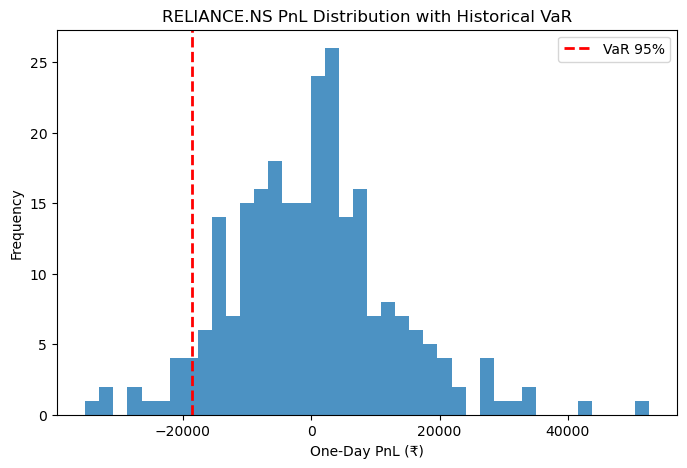

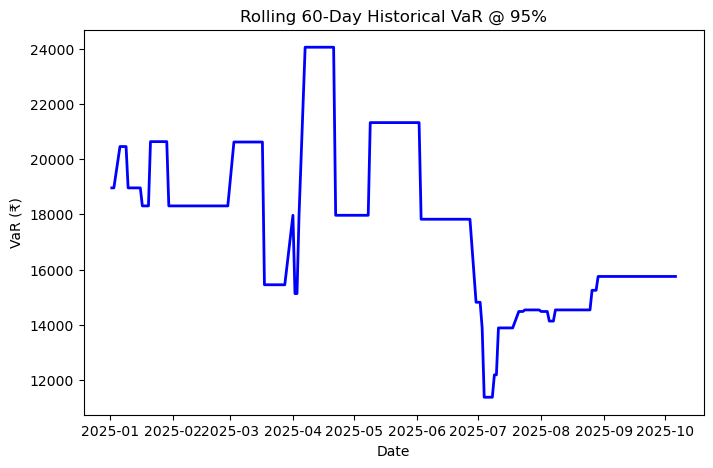

In [7]:
def main():
    # Step 1: Download closing prices
    px = get_close(TICKER, "1y", "1d")

    # Step 2: Calculate returns
    rets = px.pct_change().dropna()

    # Step 3: Calculate PnL (profit/loss in ₹)
    pnl = rets * VALUE

    # Step 4: Full-sample VaR
    var_full = hist_var_from_series(pnl, ALPHA)

    # Step 5: Rolling VaR (last 60 days)
    rolling_var = (
        pnl.rolling(WINDOW)
        .apply(lambda x: -np.percentile(x, (1 - ALPHA) * 100), raw=False)
        .dropna()
    )

    # -------- Print Summary --------
    print(f"TICKER: {TICKER}")
    print(f"Portfolio Value: ₹{VALUE:,.0f}")
    print(f"Historical VaR (full sample): ₹{var_full:,.2f}")
    if not rolling_var.empty:
        latest_var = float(rolling_var.iloc[-1])
        print(f"Historical VaR (last {WINDOW} days): ₹{latest_var:,.2f}")

    # -------- Plot Histogram with VaR --------
    plt.figure(figsize=(8, 5))
    plt.hist(pnl, bins=40, alpha=0.8)
    plt.axvline(-var_full, linestyle='--', color='red', linewidth=2,
                label=f"VaR {int(ALPHA*100)}%")
    plt.title(f"{TICKER} PnL Distribution with Historical VaR")
    plt.xlabel("One-Day PnL (₹)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # -------- Plot Rolling VaR --------
    if not rolling_var.empty:
        plt.figure(figsize=(8, 5))
        plt.plot(rolling_var.index, rolling_var.values, linewidth=2, color="blue")
        plt.title(f"Rolling {WINDOW}-Day Historical VaR @ {int(ALPHA*100)}%")
        plt.xlabel("Date")
        plt.ylabel("VaR (₹)")
        plt.show()

if __name__ == "__main__":
    main()

In [6]:
px = get_close("RELIANCE.NS", "1y", "1d")
print("Data starts on:", px.index.min())
print("Data ends on:  ", px.index.max())



Data starts on: 2024-10-07 00:00:00
Data ends on:   2025-10-06 00:00:00
